In [ ]:
# importing libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
# !pip install split-folders
# import splitfolders
# splitfolders.ratio('/content/drive/MyDrive/Tasks/task(CNN)/Cheetah/train-val', output = '/content/drive/MyDrive/Tasks/task(CNN)/Cheetah/output', seed=0, ratio=(0.9, 0.1))

Copying files: 3600 files [37:09,  1.61 files/s]


In [ ]:
# Images extraction
train_generator = ImageDataGenerator(1./255, rotation_range=15, 
                                     shear_range=0.2, zoom_range=0.2,
                                     horizontal_flip = True,
                                     preprocessing_function=preprocess_input)
normal_generator = ImageDataGenerator(1./255,preprocessing_function=preprocess_input)

train_images = train_generator.flow_from_directory('/content/drive/MyDrive/Tasks/task(CNN)/Cheetah/output/train',
                               batch_size = 32, target_size = (224,224), class_mode = 'categorical')

validation_images = normal_generator.flow_from_directory('/content/drive/MyDrive/Tasks/task(CNN)/Cheetah/output/val',
                             batch_size = 32, target_size = (224,224), class_mode = 'categorical')

test_images = normal_generator.flow_from_directory('/content/drive/MyDrive/Tasks/task(CNN)/Cheetah/output/test',
                             batch_size = 32, target_size = (224,224), class_mode = 'categorical')

Found 3240 images belonging to 4 classes.
Found 360 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
# model
architecture = VGG19(include_top=False, weights='imagenet', input_shape=[224,224,3])

for each in architecture.layers:
    architecture.trainable = False

flat = Flatten()(architecture.output)

output = Dense(4,activation = 'softmax')(flat)

model = Model(inputs = architecture.input, outputs = output)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
store = model.fit(train_images, validation_data = validation_images, epochs = 10, verbose =1)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
102/102 [==============================] - 66s 634ms/step - loss: 8.0548 - accuracy: 0.8234 - val_loss: 0.3062 - val_accuracy: 0.9889
Epoch 2/10
102/102 [==============================] - 62s 606ms/step - loss: 0.3874 - accuracy: 0.9880 - val_loss: 0.2779 - val_accuracy: 0.9889
Epoch 3/10
102/102 [==============================] - 62s 605ms/step - loss: 0.9025 - accuracy: 0.9807 - val_loss: 0.2508 - val_accuracy: 0.9833
Epoch 4/10
102/102 [==============================] - 62s 608ms/step - loss: 0.4659 - accuracy: 0.9905 - val_loss: 0.7162 - val_accuracy: 0.9833
Epoch 5/10
102/102 [==============================] - 62s 606ms/step - loss: 0.2007 - accuracy: 0.9914 - val_loss: 1.2729 - val_accuracy: 0.9889
Epoch 6/10
102/102 [==============================] - 62s 604ms/step - loss: 0.4621 - accuracy: 0.9872 - val_loss: 0.9783 - val_accuracy: 0.9861
Epoch 7/10
102/102 [==============================] - 63s 614ms/step - loss: 0.7155 - accuracy: 0.9910 - val_loss: 0.4065 - val_ac

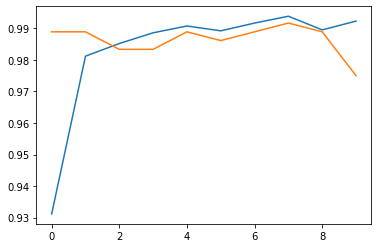

In [ ]:
#plot for accuracy
plt.plot(store.history['accuracy'])
plt.plot(store.history['val_accuracy'])
plt.show()

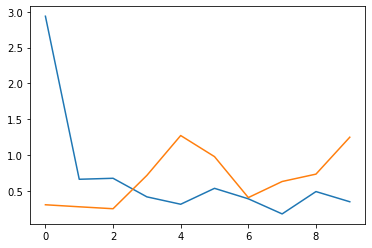

In [ ]:
# plot for loss
plt.plot(store.history['loss'])
plt.plot(store.history['val_loss'])
plt.show()

In [ ]:
# evaluating
acc = model.evaluate(test_images)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


13/13 [==============================] - 4s 269ms/step - loss: 0.8276 - accuracy: 0.9825


In [ ]:
print("Testing accuracy:",acc[1])

Testing accuracy: 0.9825000166893005
